In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [70]:
# 1. For admission :
# 1. All cause admission left join:
path = '/home/daisy/FDA_Dataset/inpatient_all_final_1.csv'
inpatient_ad_train_1 = pd.read_csv(path).iloc[:,1:]

# 2. All cause admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_all_final_2.csv'
inpatient_ad_train_2 = pd.read_csv(path).iloc[:,1:]

# 3. CVD admission left join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_1.csv'
inpatient_ad_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# 4. CVD admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_2.csv'
inpatient_ad_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

# 2. For CVD mortality	
# left join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_1.csv'
inpatient_mortality_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_2.csv'
inpatient_mortality_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

#3. For all cause mortality
# left join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_1.csv'
inpatient_mortality_all_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_2.csv'
inpatient_mortality_all_train_2 = pd.read_csv(path).iloc[:,1:]

In [71]:
inpatient_ad_train_1 # readmission within 300 days, CVD_readmission

inpatient_ad_cvd_train_1
    
inpatient_mortality_cvd_train_1

inpatient_mortality_all_train_1 # died_within_125days

,Internalpatientid,num_visits,CVD,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,...,Age 100-120 healthy,Age 20-40 hypertension,Age 40-60 hypertension,Age 60-80 hypertension,Age 80-100 hypertension,Age 100-120 hypertension,lab_count,lab_freq,lab_age_mean,lab_age_std
0,1,1483,1,0,0,26,1440,17,0,71.708835,...,0.0,0.0,4.0,177.0,0.0,0.0,290.0,12.61,71.979178,4.747024
1,2,2149,1,0,0,269,1880,0,0,65.058152,...,0.0,0.0,52.0,232.0,0.0,0.0,594.0,27.00,65.370390,3.971646
2,3,156,0,0,0,0,87,69,0,79.892190,...,0.0,0.0,0.0,9.0,178.0,0.0,1027.0,205.40,81.599486,0.560039
3,4,336,1,0,0,0,47,289,0,81.903713,...,0.0,0.0,0.0,3.0,38.0,0.0,98.0,7.00,82.637824,2.862040
4,5,124,0,0,0,0,124,0,0,75.693176,...,0.0,0.0,0.0,23.0,0.0,0.0,65.0,21.67,76.087584,0.687725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133232,169060,1223,1,0,0,231,992,0,0,65.804712,...,0.0,0.0,43.0,45.0,0.0,0.0,399.0,26.60,63.398442,5.916780
133233,169061,119,1,0,0,0,104,15,0,75.477152,...,0.0,0.0,0.0,7.0,0.0,0.0,12.0,0.92,75.083324,4.292555
133234,169062,345,0,0,0,0,345,0,0,72.124667,...,0.0,0.0,0.0,84.0,0.0,0.0,96.0,24.00,72.544153,1.468975
133235,169063,133,0,0,0,0,133,0,0,75.278206,...,0.0,0.0,0.0,5.0,0.0,0.0,13.0,2.60,73.734348,1.268574


In [72]:
inpatient_ad_train_1 

,Internalpatientid,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_admission,CVD,unique_admitting_specialty,unique_discharging_specialty,DOMICILIARY,...,Age 100-120 healthy,Age 20-40 hypertension,Age 40-60 hypertension,Age 60-80 hypertension,Age 80-100 hypertension,Age 100-120 hypertension,lab_count,lab_freq,lab_age_mean,lab_age_std
0,1,3,14.16,2,0,0,0,3,2,0,...,0.0,0.0,4.0,134.0,0.0,0.0,159.0,10.60,68.340586,3.105130
1,2,21,71.17,5,2,10,1,9,8,0,...,0.0,0.0,52.0,212.0,0.0,0.0,497.0,23.67,64.917227,3.982301
2,3,1,1.83,1,0,1,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.00,78.595827,0.234229
3,4,1,7.15,1,0,1,1,1,1,0,...,0.0,0.0,0.0,3.0,38.0,0.0,98.0,7.00,82.637824,2.862040
4,5,1,1.04,1,0,1,1,1,1,0,...,0.0,0.0,0.0,16.0,0.0,0.0,23.0,7.67,75.673279,0.783771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84531,169055,1,6.47,1,0,1,1,1,1,0,...,NaN,0.0,3.0,0.0,0.0,0.0,35.0,17.50,58.629968,0.503409
84532,169057,28,94.63,3,2,13,1,11,9,0,...,0.0,0.0,0.0,247.0,217.0,0.0,587.0,26.68,80.195538,4.555468
84533,169060,7,41.68,2,0,5,1,5,2,0,...,0.0,0.0,43.0,42.0,0.0,0.0,359.0,23.93,62.483905,5.565441
84534,169062,11,135.67,4,0,0,0,6,4,1,...,0.0,0.0,0.0,44.0,0.0,0.0,75.0,18.75,72.170051,1.402000


In [84]:
inpatient_ad_train_1.dropna()
inpatient_ad_train_1

,Internalpatientid,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_admission,CVD,unique_admitting_specialty,unique_discharging_specialty,DOMICILIARY,...,Age 100-120 healthy,Age 20-40 hypertension,Age 40-60 hypertension,Age 60-80 hypertension,Age 80-100 hypertension,Age 100-120 hypertension,lab_count,lab_freq,lab_age_mean,lab_age_std
0,1,3,14.16,2,0,0,0,3,2,0,...,0.0,0.0,4.0,134.0,0.0,0.0,159.0,10.60,68.340586,3.105130
1,2,21,71.17,5,2,10,1,9,8,0,...,0.0,0.0,52.0,212.0,0.0,0.0,497.0,23.67,64.917227,3.982301
5,8,1,21.35,1,0,0,0,1,1,0,...,0.0,0.0,3.0,17.0,0.0,0.0,28.0,2.55,66.173307,3.436646
7,11,8,270.62,4,0,0,0,5,6,5,...,0.0,0.0,20.0,23.0,0.0,0.0,317.0,28.82,60.945602,2.019659
10,16,10,53.98,2,1,2,1,7,2,0,...,0.0,0.0,0.0,18.0,0.0,0.0,293.0,22.54,76.239715,1.868434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84528,169050,2,6.53,1,0,0,0,2,1,0,...,0.0,0.0,22.0,0.0,0.0,0.0,112.0,28.00,55.856880,1.010040
84530,169053,11,135.08,3,0,3,1,5,5,0,...,0.0,0.0,0.0,67.0,64.0,0.0,453.0,56.62,79.177749,2.087995
84532,169057,28,94.63,3,2,13,1,11,9,0,...,0.0,0.0,0.0,247.0,217.0,0.0,587.0,26.68,80.195538,4.555468
84534,169062,11,135.67,4,0,0,0,6,4,1,...,0.0,0.0,0.0,44.0,0.0,0.0,75.0,18.75,72.170051,1.402000


In [97]:
inpatient_ad_cvd_train_1 = inpatient_ad_cvd_train_1.dropna()
inpatient_ad_cvd_train_1

,Internalpatientid,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_admission,CVD,unique_admitting_specialty,unique_discharging_specialty,DOMICILIARY,...,Age 100-120 healthy,Age 20-40 hypertension,Age 40-60 hypertension,Age 60-80 hypertension,Age 80-100 hypertension,Age 100-120 hypertension,lab_count,lab_freq,lab_age_mean,lab_age_std
0,1,3,14.16,2,0,0,0,3,2,0,...,0.0,0.0,4.0,134.0,0.0,0.0,159.0,10.60,68.340586,3.105130
3,11,8,270.62,4,0,0,0,5,6,5,...,0.0,0.0,20.0,23.0,0.0,0.0,317.0,28.82,60.945602,2.019659
6,16,10,53.98,2,1,2,1,7,2,0,...,0.0,0.0,0.0,18.0,0.0,0.0,293.0,22.54,76.239715,1.868434
8,19,7,36.50,3,1,2,1,5,5,0,...,0.0,0.0,20.0,78.0,0.0,0.0,324.0,23.14,64.881822,4.115423
10,28,3,8.49,1,0,0,0,1,1,0,...,0.0,0.0,45.0,181.0,0.0,0.0,266.0,19.00,62.019019,3.518408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61677,169047,6,15.33,3,0,1,1,5,4,0,...,0.0,0.0,56.0,45.0,0.0,0.0,80.0,3.81,59.637333,5.891561
61678,169050,2,6.53,1,0,0,0,2,1,0,...,0.0,0.0,22.0,0.0,0.0,0.0,112.0,28.00,55.856880,1.010040
61680,169053,11,135.08,3,0,3,1,5,5,0,...,0.0,0.0,0.0,67.0,64.0,0.0,453.0,56.62,79.177749,2.087995
61681,169057,28,94.63,3,2,13,1,11,9,0,...,0.0,0.0,0.0,247.0,217.0,0.0,587.0,26.68,80.195538,4.555468


In [75]:
X_ad = inpatient_ad_train_1.drop(columns = ['Internalpatientid','readmission within 300 days', 'CVD_readmission'])
y_ad = inpatient_ad_train_1[['readmission within 300 days']]

In [103]:
X_ad_cvd = inpatient_ad_cvd_train_1.drop(columns = ['Internalpatientid','readmission within 300 days','CVD_readmission'])
y_ad_cvd = inpatient_ad_cvd_train_1[['CVD_readmission']]

## Feature selection 

### Tree based feature selection and random forest classification

the higher, the more important the feature. 

To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

In [77]:
def rf_importance_score(X, y):
       clf_rf = RandomForestClassifier()      
       clr_rf = clf_rf.fit(X,y)
       importances = clr_rf.feature_importances_
       std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
              axis=0)
       indices = np.argsort(importances)[::-1]
       # Print the feature ranking
       # print("Feature ranking:")

       #for i in range(X.shape[1]):
       #    print(i, X.columns[indices[i]], importances[indices[i]])

       # Plot the feature importances of the forest

       plt.figure(1, figsize=(14, 13))
       plt.title("Feature importances")
       plt.bar(range(X.shape[1]), importances[indices],
              color="g", yerr=std[indices], align="center")
       plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
       plt.xlim([-1, X.shape[1]])
       plt.show()

       score_list_rf = zip(X.columns[indices], importances[indices])
       features_to_keep_rf = [name for name,score in score_list_rf]
       return features_to_keep_rf

/tmp/ipykernel_328293/2208155826.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X,y)


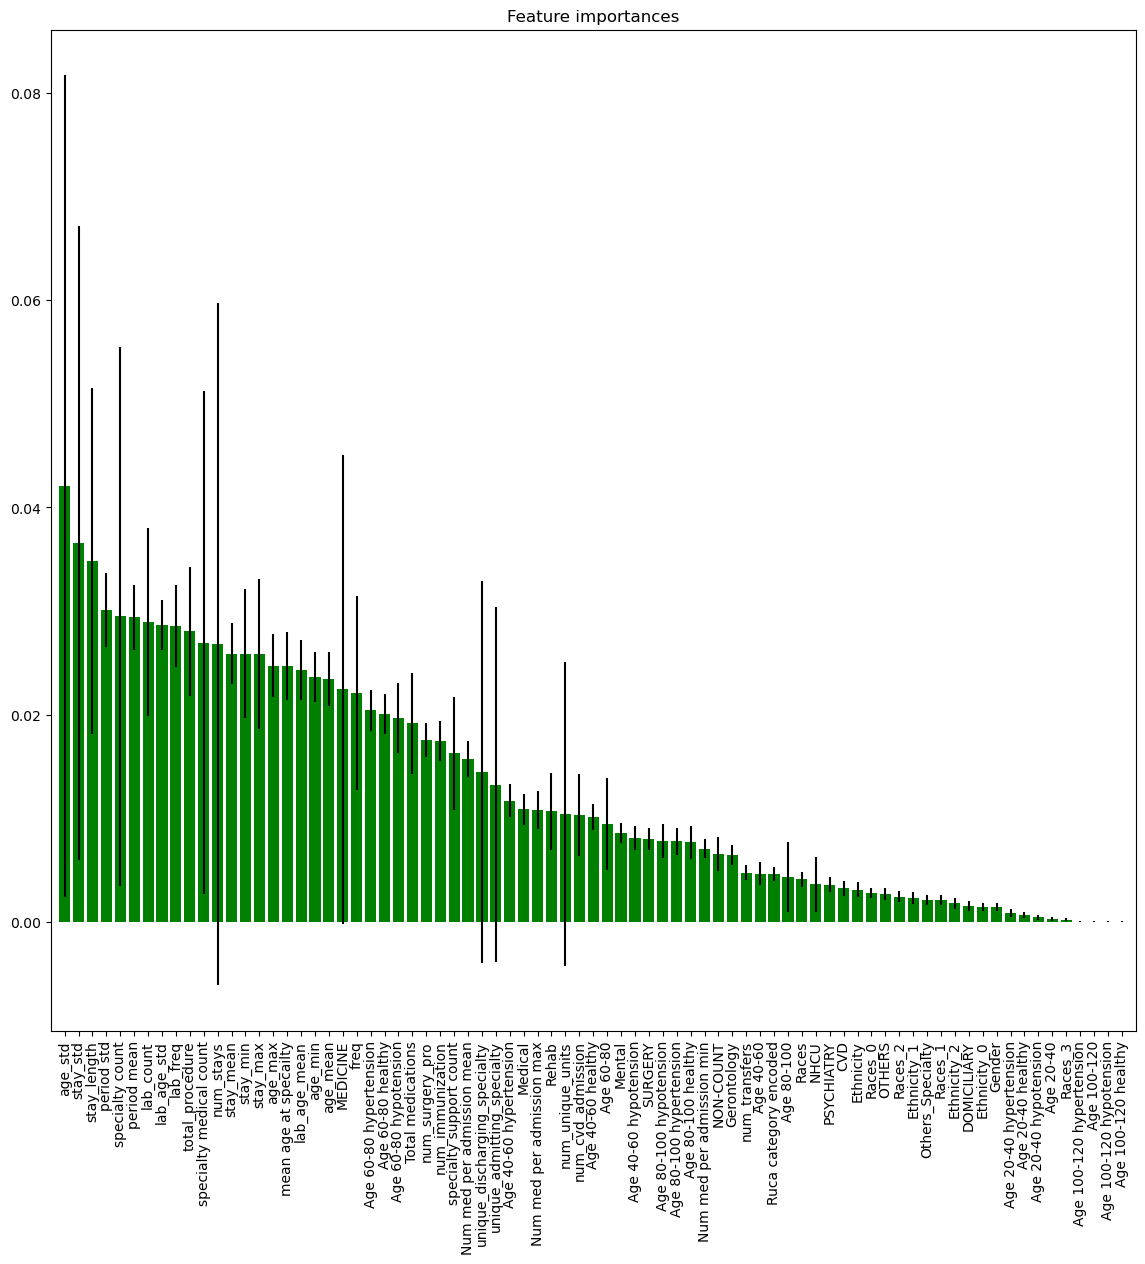

In [99]:
features_to_keep_ad_rf = rf_importance_score(X_ad, y_ad)

/tmp/ipykernel_328293/2208155826.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X,y)


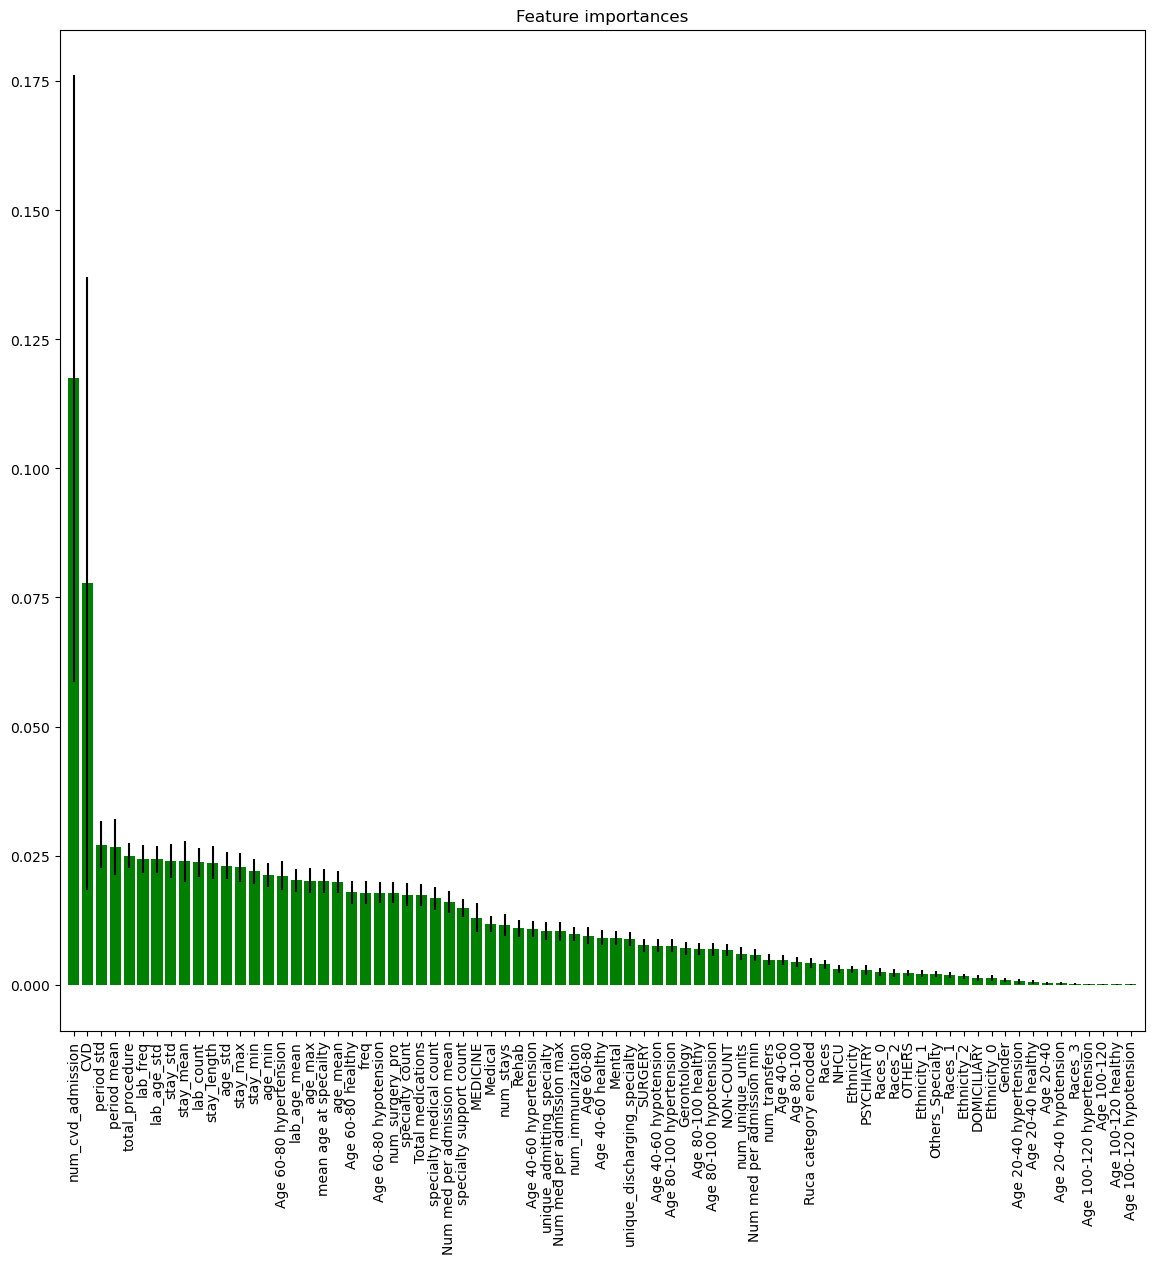

In [105]:
features_to_keep_ad_cvd_rf = rf_importance_score(X_ad_cvd, y_ad_cvd)

### Principle component analysis (PCA)

Fundemental dimension reduction technique

first step is decorrelation:

rotates data samples to be aligned with axes
shifts data asmples so they have mean zero
no information lost

fit() : learn how to shift samples

transform(): apply the learned transformation. It can also be applies test data

Resulting PCA features are not linearly correlated

Principle components: directions of variance

In [ ]:
def PCA_ncomponent(X):
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)

    from sklearn.decomposition import PCA
    # Number of components to keep. if n_components is not set all components are kept:
    pca = PCA() 
    pca.fit(X_sc)

    plt.figure(1, figsize=(14, 13))
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.grid(True)
    plt.xlabel('n components')
    plt.ylabel('explained variance ratio')

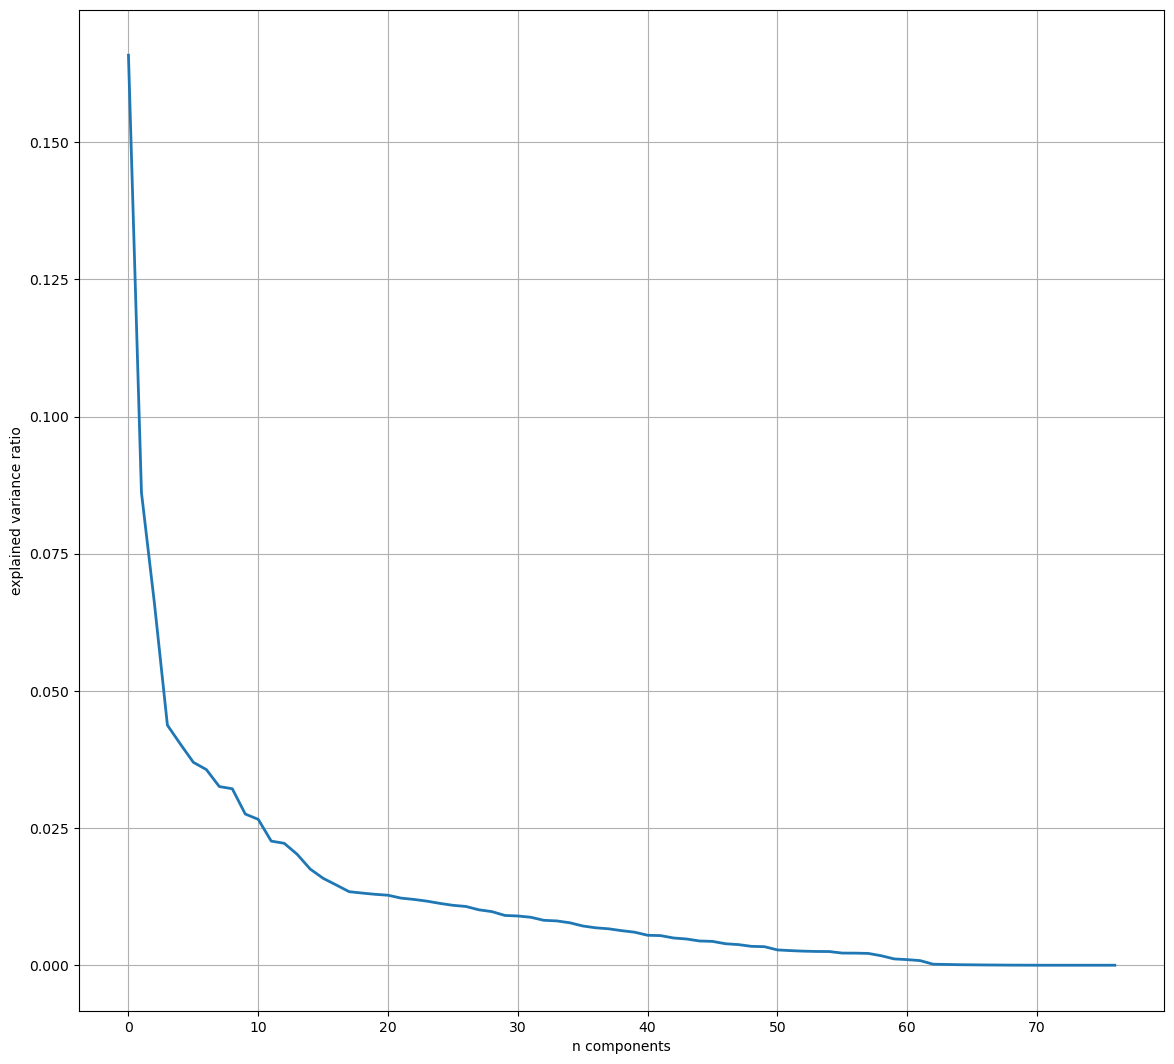

In [ ]:
PCA_ncomponent(X_ad)

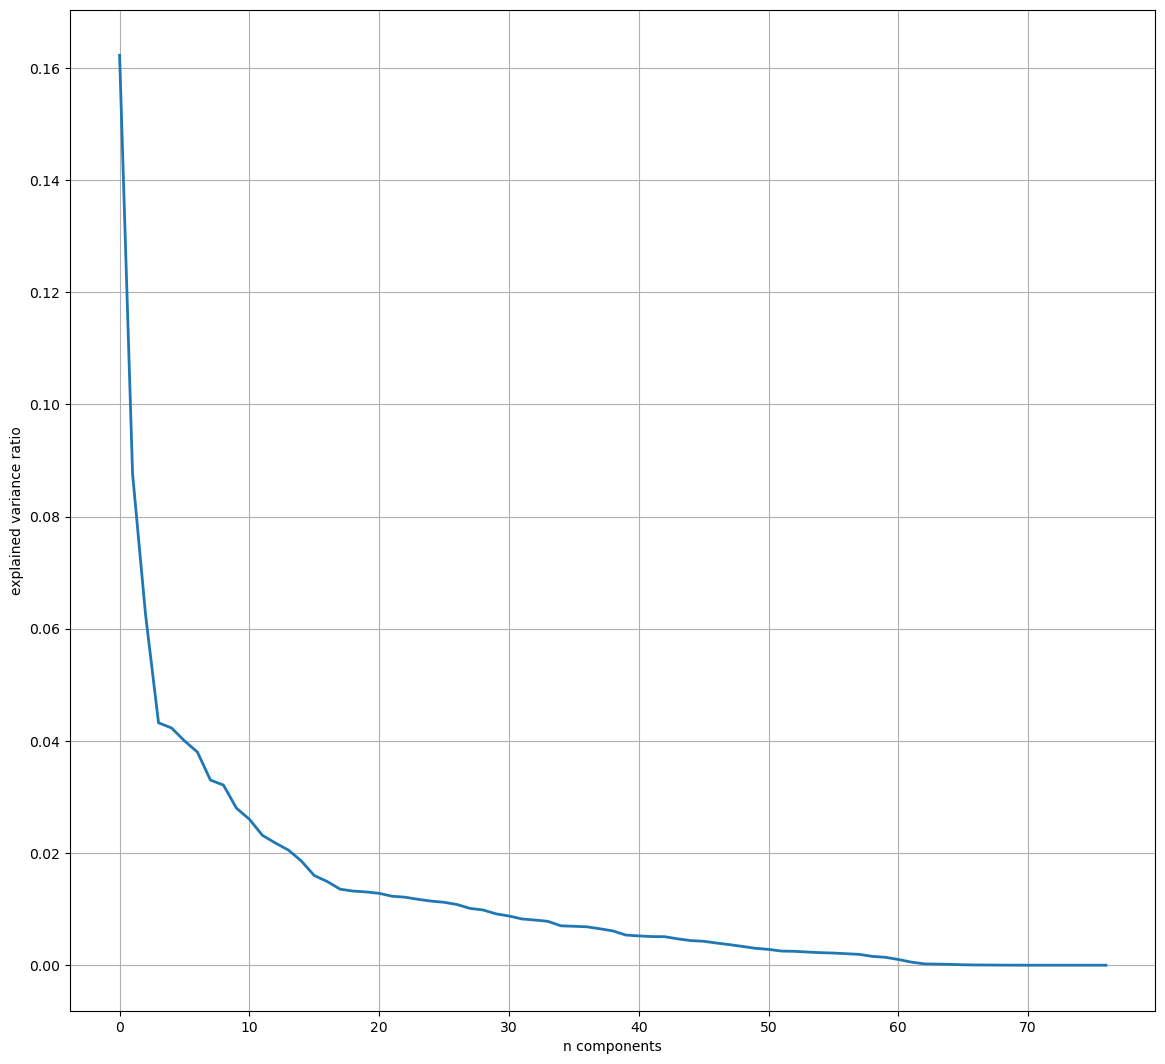

In [106]:
PCA_ncomponent(X_ad_cvd)

In [107]:
def PCA_select(X, n_num):    
    pca = PCA(n_num) 
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)
    pca.fit(X_sc)
    # The components are sorted by decreasing explained_variance_.
    n_pcs= pca.components_.shape[0]

    # get the index of the most important feature on EACH component
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    # get the names
    most_important_names = [X.columns[most_important[i]] for i in range(n_pcs)]

    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    features_to_keep_pca = list(dic.values())
    return features_to_keep_pca

In [108]:
features_to_keep_ad_pca = PCA_select(X_ad, 18)

In [109]:
features_to_keep_ad_cvd_pca = PCA_select(X_ad_cvd, 18)

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
# find best scored 20 features
# chi2: score function
def SelectBestK(X, y, n_num):
    select_feature = SelectKBest(chi2, k=n_num).fit(X, y)
    #print('Score list:', select_feature.scores_)
    #print('Feature list:', X.columns)
    score_df = pd.DataFrame({'Name':X.columns, 'Score':select_feature.scores_})
    score_df.sort_values(by = 'Score').reset_index(drop =True)
    score_list = list(zip(X.columns,select_feature.scores_))
    score_list = sorted(score_list, key = lambda x: x[1],reverse=True)
    features_to_keep_bestk = [name for name,score in score_list]
    return features_to_keep_bestk


In [111]:
features_to_keep_ad_bestk = SelectBestK(X_ad, y_ad, 20)

In [112]:
features_to_keep_ad_cvd_bestk = SelectBestK(X_ad_cvd, y_ad_cvd, 20)

In [113]:
set(features_to_keep_ad_rf[:20]).intersection(features_to_keep_ad_bestk[:20])

{'lab_count',
 'lab_freq',
 'num_stays',
 'specialty count',
 'specialty medical count',
 'stay_length',
 'stay_max',
 'stay_min',
 'stay_std',
 'total_procedure'}

In [114]:
set(features_to_keep_ad_cvd_rf[:20]).intersection(features_to_keep_ad_cvd_bestk[:20])

{'Age 60-80 hypertension',
 'CVD',
 'lab_count',
 'num_cvd_admission',
 'period mean',
 'period std',
 'stay_length',
 'stay_max',
 'stay_mean',
 'stay_min',
 'stay_std',
 'total_procedure'}